In [4]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [5]:
#Reading pickle of all bank data from 2006 to 2016
df = pd.read_pickle('all_banks') 
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [10]:
#Finding maximum closing price from 2006-2016
df.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [12]:
#Calculating the return % for each bank's stock
#Creating an empty dataframe
returns = pd.DataFrame()
#Creating a list of tickers/indices for each bank
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [13]:
for x in tickers:
    returns[x+' Return'] = df[x]['Close'].pct_change()

returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.000951
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005714
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586    0.000000

In [14]:
sns.pairplot(returns[1:])

In [15]:
# Citigroup Stocks look really strange...
#Returning worst drop in stocks
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [16]:
#20/1/2009 was the inauguration of Barack Obama...
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [17]:
#Citigroup had their best single day gain of returns 
#3 days after their massive drop


In [18]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [19]:
#Citigroup has the largest std() and thus, is the riskiest

In [22]:
#Checking standard deviations for the year 2015
returns.loc['2015-01-01':'2015-12-31'].std() 

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [23]:
#Morgan Stanley and Bank of America are the riskiest here

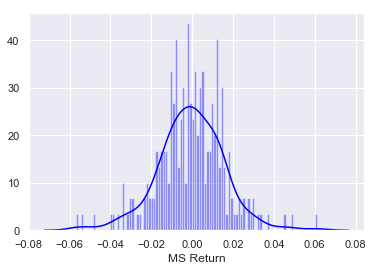

In [26]:
#Creating a distplot for the 2015 return % for Morgan Stanley
sns.set()
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='blue', bins = 100)

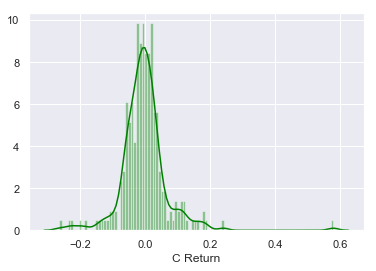

In [27]:
#creating a distplot of the 2008 returns for Citigroup
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color = 'green', bins=100)

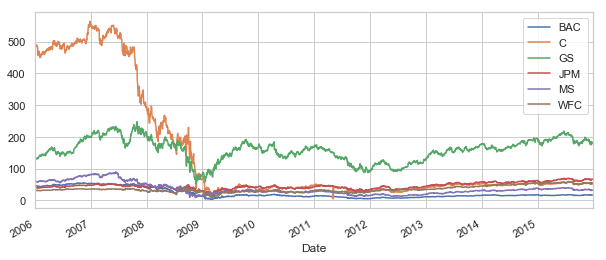

In [32]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
for x in tickers:
    df[x]['Close'].plot(figsize=(10,4), label = x)
plt.legend()

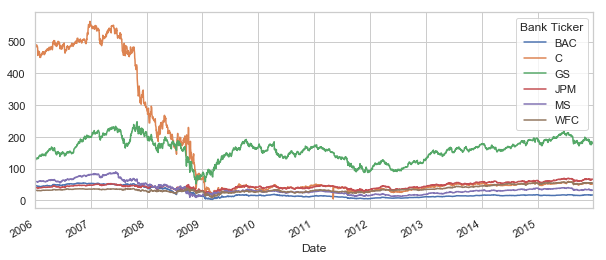

In [33]:
df.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(10,4), label = x)

In [42]:
plt.figure(figsize=(12,6))
df.xs(key='Close', axis=1, level='Stock Info')['BAC'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df.xs(key='Close', axis=1, level='Stock Info')['BAC'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

In [44]:
#Creating a heatmap of the correlation between the stocks close price
sns.heatmap(df.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

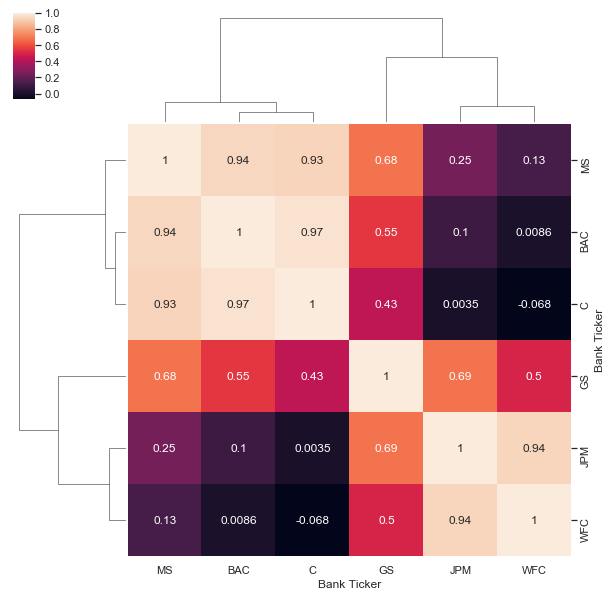

In [45]:
sns.clustermap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [55]:
import plotly
import cufflinks as cf
cf.go_offline()


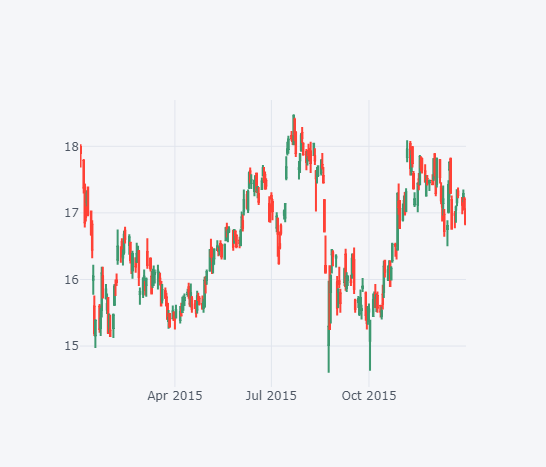

In [73]:
#Candle plot for Bank of America's Stocks
df.xs(key='BAC',axis=1,level='Bank Ticker').loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

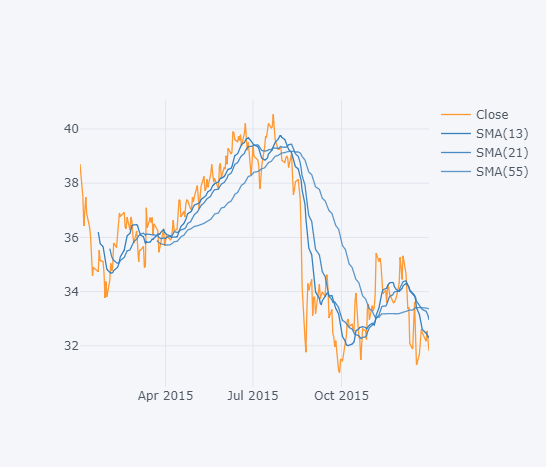

In [80]:
#Moving Averages plot for Morgan Stanley
df['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [81]:
#Bollinger Band Plot for Bank of America
df['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')